In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
data = pd.read_csv("sph6004_assignment1_data.csv")

# Remove columns with more than 50% missing values
threshold = len(data) * 0.5
data = data.dropna(thresh=threshold, axis=1)

# Identify numeric and categorical columns, excluding the target column 'aki'
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns.drop('aki', errors='ignore')
categorical_features = data.select_dtypes(include=['object']).columns

# Numeric features processing: Impute missing values and standardize
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Categorical features processing: Impute missing values and apply one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine processing for both numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Apply transformations to the data
X_processed = preprocessor.fit_transform(data)
X_processed = pd.DataFrame(X_processed)

# Separate features and target variable
y = data['aki']
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42)

# Calculate correlation with 'aki' on training set
correlation_with_aki = X_train.corrwith(y_train).abs().sort_values(ascending=False)

# Select top 30 features
top_30_features = correlation_with_aki.head(30).index
X_train_top_30 = X_train[top_30_features]
X_test_top_30 = X_test[top_30_features]

In [8]:
# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_decision = dt_classifier.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, y_pred_decision))

              precision    recall  f1-score   support

           0       0.46      0.45      0.46      5099
           1       0.20      0.20      0.20      2964
           2       0.37      0.38      0.37      4807
           3       0.30      0.29      0.29      2406

    accuracy                           0.36     15276
   macro avg       0.33      0.33      0.33     15276
weighted avg       0.36      0.36      0.36     15276



In [9]:
# Initialize the Logistic Regression Classifier
lr_classifier = LogisticRegression(random_state=42, max_iter=1000)  # Adjust max_iter if necessary

# Train the classifier
lr_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_logistic = lr_classifier.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, y_pred_logistic))

              precision    recall  f1-score   support

           0       0.52      0.69      0.60      5099
           1       0.29      0.01      0.03      2964
           2       0.43      0.63      0.51      4807
           3       0.54      0.32      0.40      2406

    accuracy                           0.48     15276
   macro avg       0.45      0.41      0.38     15276
weighted avg       0.45      0.48      0.43     15276



In [10]:
#Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_random = rf_model.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, y_pred_random))

              precision    recall  f1-score   support

           0       0.53      0.68      0.60      5099
           1       0.30      0.03      0.06      2964
           2       0.43      0.61      0.50      4807
           3       0.53      0.34      0.42      2406

    accuracy                           0.48     15276
   macro avg       0.45      0.42      0.39     15276
weighted avg       0.45      0.48      0.43     15276



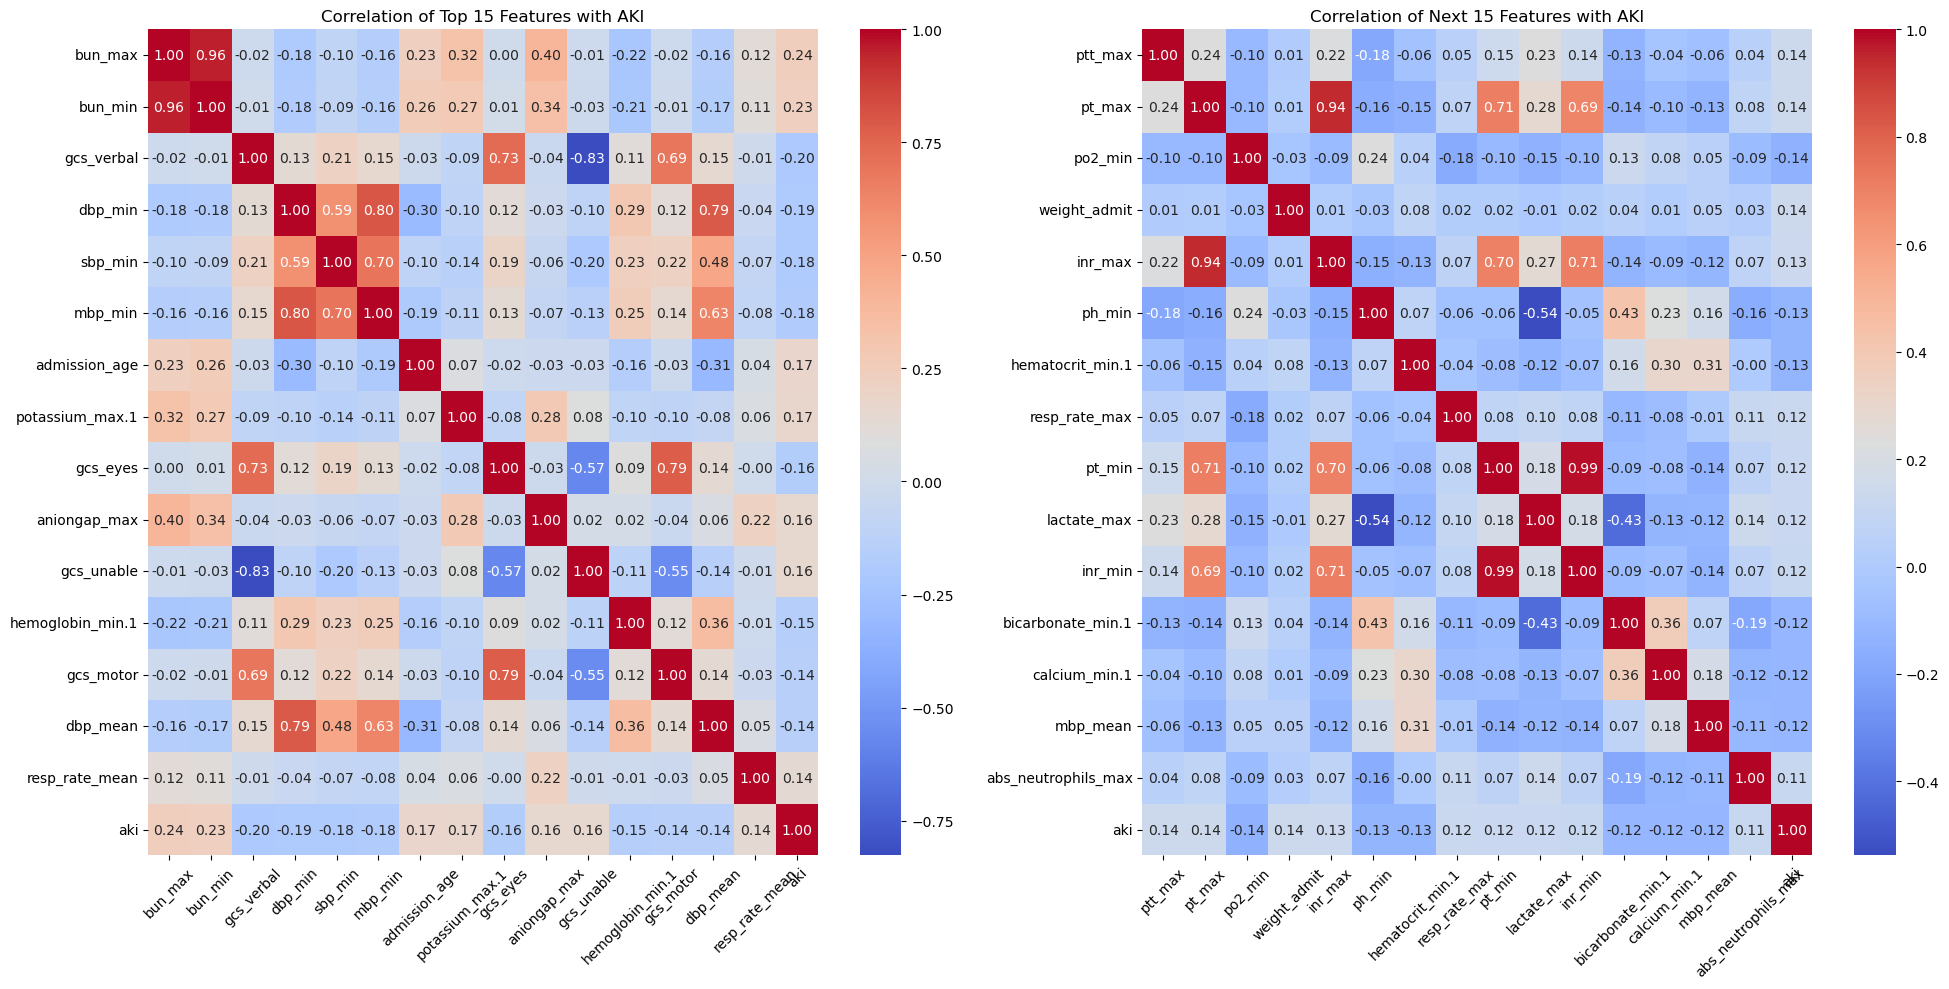

In [15]:
# Recalculate the top 15 numerical features and their correlation with 'aki'
correlation_with_aki_original = data[numeric_features].corrwith(data['aki']).abs().sort_values(ascending=False)

# Define the top 15 features for both groups again
top_15_features_group1_original = correlation_with_aki_original.head(15).index.tolist()
top_15_features_group2_original = correlation_with_aki_original.iloc[15:30].index.tolist()

# Recalculate correlation matrices for the original top 15 features groups with 'aki'
correlation_matrix_group1_original = data[top_15_features_group1_original + ['aki']].corr()
correlation_matrix_group2_original = data[top_15_features_group2_original + ['aki']].corr()

# Plotting the heatmaps for each group
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Group 1
sns.heatmap(correlation_matrix_group1_original, annot=True, cmap='coolwarm', fmt=".2f", ax=ax[0])
ax[0].set_title('Correlation of Top 15 Features with AKI')
ax[0].tick_params(axis='x', rotation=45)
ax[0].tick_params(axis='y', rotation=0)

# Group 2
sns.heatmap(correlation_matrix_group2_original, annot=True, cmap='coolwarm', fmt=".2f", ax=ax[1])
ax[1].set_title('Correlation of Next 15 Features with AKI')
ax[1].tick_params(axis='x', rotation=45)
ax[1].tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.show()
